In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt    # For plotting
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
file="C:/Users/shash/Desktop/flight/Data_Train.xlsx"
file2="C:/Users/shash/Desktop/flight/Test_set.xlsx"
df=pd.read_excel(file)
print(df.head())
df2=pd.read_excel(file2)


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [3]:
print(df2.head())

             Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info  


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df1=df.copy()
df1['Day_of_booking']='1/3/2019'
df1['Day_of_booking']=pd.to_datetime(df1['Day_of_booking'],format='%d/%m/%Y')
df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'],format='%d/%m/%Y')
df1['departure_days']=(df1['Date_of_Journey']-df1['Day_of_booking']).dt.days
df['departure_days']=df1['departure_days']
del df1
print(df.head())
df3=df2.copy()
df3['Day_of_booking']='1/3/2019'
df3['Day_of_booking']=pd.to_datetime(df3['Day_of_booking'],format='%d/%m/%Y')
df3['Date_of_Journey']=pd.to_datetime(df3['Date_of_Journey'],format='%d/%m/%Y')
df3['departure_days']=(df3['Date_of_Journey']-df3['Day_of_booking']).dt.days
df2['departure_days']=df3['departure_days']
del df3


       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   departure_days  
0              23  
1              61  
2             100  
3           

In [6]:
df=df.drop(['Date_of_Journey'],axis=1)

In [7]:
df2.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,departure_days
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,97
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,72
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,81
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,81
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,115


In [8]:
df2=df2.drop(['Date_of_Journey'],axis=1)

In [9]:
df2.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,departure_days
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,97
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,72
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,81
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,81
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,115


In [10]:
df.iloc[:,6] = df.iloc[:,6].replace("h",'', regex=True)
df.iloc[:,6] = df.iloc[:,6].replace("m",'', regex=True)

df2.iloc[:,6] = df2.iloc[:,6].replace("h",'', regex=True)
df2.iloc[:,6] = df2.iloc[:,6].replace("m",'', regex=True)
# df.iloc[:,6] = pd.to_datetime(df.iloc[:,6],format='%H:%M')
df.dtypes


Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
departure_days      int64
dtype: object

In [11]:
new = df['Duration'].str.split(" ", n = 2, expand = True) 
df1 = df.copy()
df1[['Duration_hour','Duration_min']] = new
df1[['Duration_hour','Duration_min']] = df1[['Duration_hour','Duration_min']].fillna(0)
df1 = df1.drop(['Duration'],axis = 1)
df1['Dep_Time']= df1['Dep_Time'].str.split(":", n = 1, expand = True)[0]
df1[['Dep_Time']] = df1[['Dep_Time']].fillna(0)

In [12]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,departure_days,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22,01:10 22 Mar,non-stop,No info,3897,23,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05,13:15,2 stops,No info,7662,61,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09,04:25 10 Jun,2 stops,No info,13882,100,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18,23:30,1 stop,No info,6218,72,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16,21:35,1 stop,No info,13302,0,4,45


In [13]:
new = df2['Duration'].str.split(" ", n = 2, expand = True) 
df3 = df2.copy()
df3[['Duration_hour','Duration_min']] = new
df3[['Duration_hour','Duration_min']] = df3[['Duration_hour','Duration_min']].fillna(0)
#fillna is done because when we split some features the splits parts are of none type
#fillna helps them to convert to required type
df3 = df3.drop(['Duration'],axis = 1)
df3['Dep_Time']= df3['Dep_Time'].str.split(":", n = 1, expand = True)[0]
df3[['Dep_Time']] = df3[['Dep_Time']].fillna(0)

In [14]:

df1.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,departure_days,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22,01:10 22 Mar,non-stop,No info,3897,23,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05,13:15,2 stops,No info,7662,61,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09,04:25 10 Jun,2 stops,No info,13882,100,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18,23:30,1 stop,No info,6218,72,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16,21:35,1 stop,No info,13302,0,4,45


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
Airline            2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
departure_days     2671 non-null int64
Duration_hour      2671 non-null object
Duration_min       2671 non-null object
dtypes: int64(1), object(10)
memory usage: 229.7+ KB


In [16]:
df1.iloc[:,[10,11,4]] = df1.iloc[:,[10,11,4]].astype('int')
df1.dtypes

df3.iloc[:,[9,10,4]] = df3.iloc[:,[9,10,4]].astype('int')
df1.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time            int32
Arrival_Time       object
Total_Stops        object
Additional_Info    object
Price               int64
departure_days      int64
Duration_hour       int32
Duration_min        int32
dtype: object

In [17]:
df1=df1.drop(['Arrival_Time'],axis=1)
df3=df3.drop(['Arrival_Time'],axis=1)

In [18]:
df1.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,departure_days,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22,non-stop,No info,3897,23,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5,2 stops,No info,7662,61,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9,2 stops,No info,13882,100,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18,1 stop,No info,6218,72,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16,1 stop,No info,13302,0,4,45


In [19]:
df1 = pd.get_dummies(df1)
df1.head()

df3 = pd.get_dummies(df3)
df3.head()

,Dep_Time,departure_days,Duration_hour,Duration_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,17,97,10,55,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,6,72,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,19,81,23,45,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8,81,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,23,115,2,50,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [20]:
df1.head()


,Dep_Time,Price,departure_days,Duration_hour,Duration_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,22,3897,23,2,50,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,5,7662,61,7,25,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9,13882,100,19,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,18,6218,72,5,25,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,16,13302,0,4,45,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Columns: 171 entries, Dep_Time to Additional_Info_Red-eye flight
dtypes: int32(3), int64(2), uint8(166)
memory usage: 2.0 MB


In [22]:
X = df1.copy().drop('Price',axis=1) 
y = df["Price"]

## Split the data into trainx, testx, trainy, testy with test_size = 0.20 using sklearn
trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.20)

## Print the shape of X_train, X_test, y_train, y_test
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(8546, 170)
(2137, 170)
(8546,)
(2137,)


In [23]:
trainx.head()

,Dep_Time,departure_days,Duration_hour,Duration_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
7956,8,63,2,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
440,21,51,2,50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1258,6,20,15,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7762,16,103,20,55,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9363,16,69,6,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
trainy.head()

7956     3543
440      5228
1258     6558
7762    11542
9363    14781
Name: Price, dtype: int64

In [25]:
testy.head()




3909     7695
4686    16274
7055     6258
6150     7893
946     27992
Name: Price, dtype: int64

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [27]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=6,metric='euclidean')
%time KNN.fit(trainx,trainy) 

Wall time: 100 ms


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

In [28]:
import math
%time KNN_train_pred = KNN.predict(trainx)
print(mean_absolute_error(KNN_train_pred,trainy))

%time KNN_test_pred = KNN.predict(testx)
print(mean_absolute_error(KNN_test_pred,testy))



Wall time: 1.56 s
1629.6824830329977
Wall time: 299 ms
2007.691077834971


In [29]:

print(testy.max())


52285


In [30]:
corr=df1.corr()

In [31]:
corr['Price'].sort_values(ascending=False)

Price                   1.000000
Duration_hour           0.508796
Airline_Jet Airways     0.416135
Total_Stops_1 stop      0.344662
Total_Stops_2 stops     0.320517
                          ...   
Airline_SpiceJet       -0.296552
Destination_Delhi      -0.313401
Route_BLR → DEL        -0.315249
Airline_IndiGo         -0.361048
Total_Stops_non-stop   -0.613760
Name: Price, Length: 171, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024108E30EC8>,
      dtype=object)

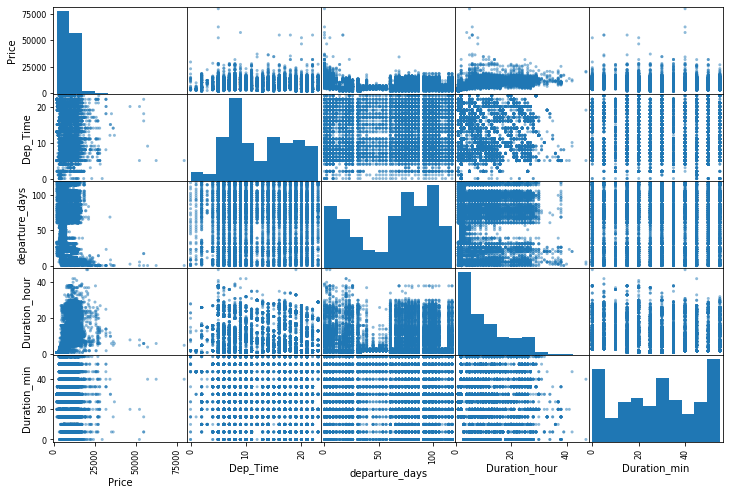

In [32]:
from pandas.plotting import scatter_matrix
attributes=['Price','Dep_Time','departure_days','Duration_hour','Duration_min']
scatter_matrix(df1[attributes],figsize=(12,8))

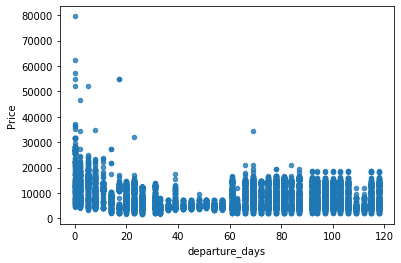

In [33]:
df1.plot(kind="scatter",x="departure_days",y="Price",alpha=0.8)


In [34]:
y1 = df1.get(['Price','Dep_Time','departure_days','Duration_hour','Duration_min'])
print(y1.head())

   Price  Dep_Time  departure_days  Duration_hour  Duration_min
0   3897        22              23              2            50
1   7662         5              61              7            25
2  13882         9             100             19             0
3   6218        18              72              5            25
4  13302        16               0              4            45


In [35]:
import seaborn as sns